# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

**Вариант 3: задания 1 и 3 на наборе данных CIFAR-10**


## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
!bash scripts/datasets/get_datasets.sh

--2025-11-23 06:19:42--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  68.3MB/s    in 2.4s    

2025-11-23 06:19:44 (68.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [13]:
def get_dataset():
  cifar10_dir = 'scripts/datasets/cifar-10-batches-py'
  try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
  except:
    pass
    return load_CIFAR10(cifar10_dir);

In [14]:
X_train, y_train, X_test, y_test = get_dataset()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



In [ ]:
# названия классов CIFAR-10
cifar_classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# кол-во примеров
samples_count = 5
num_classes = len(cifar_classes)

In [ ]:
def get_random_imgs():
  # для каждого класса выбираем samples_count рандомных индексов из выборки y_train
  for class_idx in range(num_classes):
    random_idxs = np.random.choice(np.where(y_train == class_idx)[0], samples_count, replace=False)
    visualize_img(class_idx, random_idxs)
  plt.show()

In [ ]:
def visualize_img(class_idx, random_idxs):
  # отрисовываем изображение в соответствующих строке и столбце
  for i, idx in enumerate(random_idxs):
        plt_idx = i * num_classes + class_idx + 1
        plt.subplot(samples_count, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cifar_classes[class_idx])

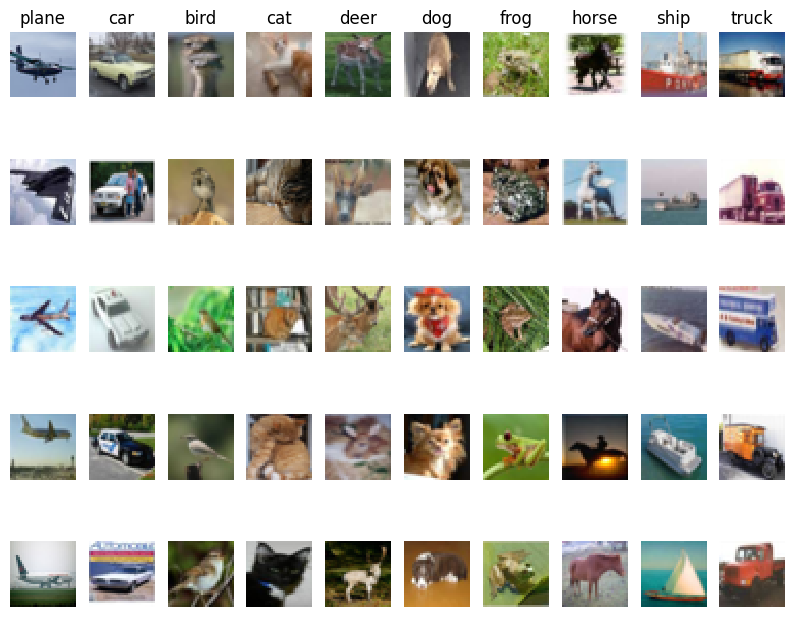

In [ ]:
get_random_imgs()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [5]:
def get_small_set(X, y, num_set=1000):
  # выбираем num_set экземпляров для выборки
  X_small = X[0:num_set]
  y_small = y[0:num_set]
  # преобразуем данные в одномерные массивы
  X_small = X_small.reshape(X_small.shape[0], -1)
  return X_small, y_small

In [ ]:
# Обучающая выборка
X_train_knn, y_train_knn = get_small_set(X_train, y_train, num_set=5000)
# Тестовая выборка
X_test_knn, y_test_knn = get_small_set(X_test, y_test, num_set=500)

print('Training data shape: ', X_train_knn.shape)
print('Training labels shape: ', y_train_knn.shape)
print('Test data shape: ', X_test_knn.shape)
print('Test labels shape: ', y_test_knn.shape)

Training data shape:  (5000, 3072)
Training labels shape:  (5000,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [ ]:
from scripts.classifiers.k_nearest_neighbor import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train_knn, y_train_knn)

1.5 Выполните классификацию на тестовой выборке

In [ ]:
k = 2

In [ ]:
y_pred_knn = classifier.predict(X_test_knn, k=k, num_loops=0)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


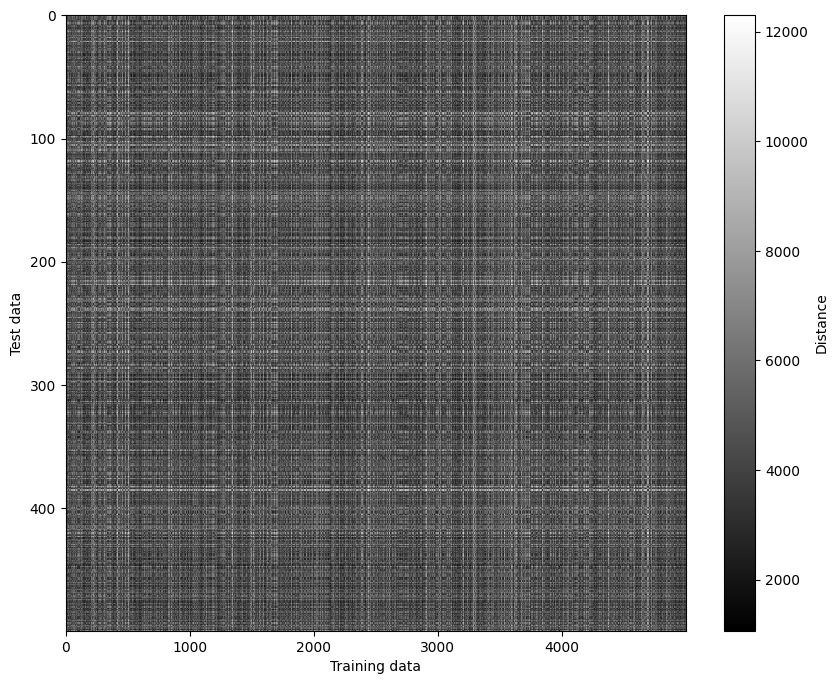

In [ ]:
# Вычисление матрицы расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки
dists = classifier.compute_distances_no_loops(X_test_knn)
# Визуализация матрицы расстояний: каждая строка относится к тестовому изображению,
# а каждый столбец - к обучающему изображению
plt.imshow(dists, interpolation='none', aspect='auto')
plt.colorbar(label='Distance')
plt.xlabel('Training data')
plt.ylabel('Test data')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [43]:
def calc_accuracy_knn(y_pred, y_test):
  return float(np.mean(y_pred == y_test));

In [ ]:
accuracy_knn = calc_accuracy_knn(y_pred_knn, y_test_knn)
print(f"Доля правильно классифицированных: {accuracy_knn:.3%}")

Доля правильно классифицированных: 22.400%


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [ ]:
k_values = [2,3,4,5,10,20,30,50,75,100]

In [ ]:
accuracy_array_knn = {}
# Пробегаемся по каждому ключу и считаем для него долю правильно классифицированных изображений
for k in k_values:
    knn_classifier = KNearestNeighbor()
    knn_classifier.train(X_train_knn, y_train_knn)
    preds = knn_classifier.predict(X_test_knn, k=k, num_loops=0)
    accuracy_array_knn[k] = calc_accuracy_knn(preds, y_test_knn)

In [ ]:
print(f"Доля правильно классифицированных изображений: {accuracy_array_knn}")

Доля правильно классифицированных изображений: {2: 0.224, 3: 0.272, 4: 0.272, 5: 0.278, 10: 0.282, 20: 0.272, 30: 0.254, 50: 0.252, 75: 0.222, 100: 0.222}


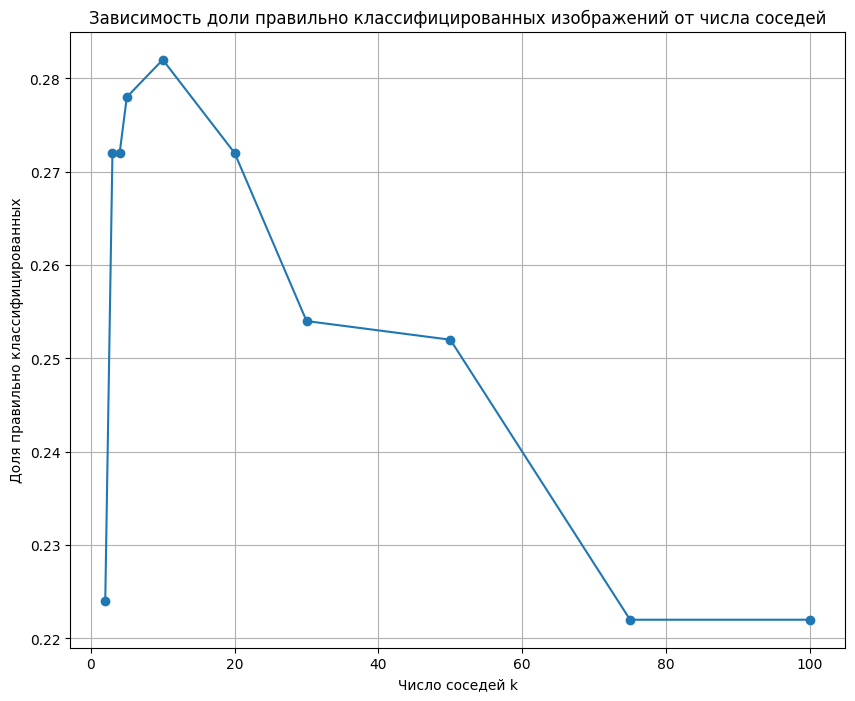

In [ ]:
plt.title("Зависимость доли правильно классифицированных изображений от числа соседей")
plt.plot(accuracy_array_knn.keys(), accuracy_array_knn.values(), marker='o')
plt.xlabel("Число соседей k")
plt.ylabel("Доля правильно классифицированных")
plt.grid(True)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [ ]:
def k_fold_split(X, y, num_folds=5):
    idxs = np.arange(X.shape[0])
    np.random.shuffle(idxs)
    # делит выборку на num_folds блоков.
    folds = np.array_split(idxs, num_folds)
    # возвращает список индексов folds:
    return folds

In [ ]:
def cross_validate_knn(X, y, k_values, num_folds=5):
    folds = k_fold_split(X, y, num_folds=num_folds)
    k_to_acc = {k: [] for k in k_values}

    for fold_idx in range(num_folds):
        # validation fold
        val_idx = folds[fold_idx]
        # training folds = все остальные
        train_idx = np.hstack([folds[i] for i in range(num_folds) if i != fold_idx])
        X_train_f = X[train_idx]
        y_train_f = y[train_idx]
        X_val_f = X[val_idx]
        y_val_f = y[val_idx]
        # проверка разных k
        for k in k_values:
            # обучение kNN
            knn = KNearestNeighbor()
            knn.train(X_train_f, y_train_f)
            y_pred = knn.predict(X_val_f, k=k, num_loops=0)
            acc = np.mean(y_pred == y_val_f)
            k_to_acc[k].append(acc)

    # средняя точность по фолдам
    k_avg = {k: round(float(np.mean(k_to_acc[k])), 4) for k in k_values}
    return k_avg

In [ ]:
 k_avg = cross_validate_knn(X_train_knn, y_train_knn, k_values, num_folds=6)

In [ ]:
for k in k_values:
    print(f"k={k}, , mean={k_avg[k]:.4f}")

best_k = max(k_avg, key=k_avg.get)
print("Лучшее k =", best_k)

k=2, , mean=0.2342
k=3, , mean=0.2586
k=4, , mean=0.2690
k=5, , mean=0.2714
k=10, , mean=0.2766
k=20, , mean=0.2734
k=30, , mean=0.2704
k=50, , mean=0.2690
k=75, , mean=0.2658
k=100, , mean=0.2610
Лучшее k = 10



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [ ]:
best_classifier = KNearestNeighbor()
best_classifier.train(X_train_knn, y_train_knn)
y_pred_knn = classifier.predict(X_test_knn, k=best_k, num_loops=0)
accuracy_knn = calc_accuracy_knn(y_pred_knn, y_test_knn)
print(f"Доля правильно классифицированных: {accuracy_knn:.3%}")

Доля правильно классифицированных: 28.200%


1.11 Сделайте выводы по результатам 1 части задания.

Точность kNN классификатора на тестовой выборке с двумя соседями составила 22.4%, что является относительно низким результатом.

С помощью кросс-валидации было определено оптимальное значением параметра k = 10.

После переобучения классификатора с использованием оптимального значения k точность классификации на тестовой выборке составила 28.2%, что позволило увеличить точность классификатора.

Несмотря на увеличившуюся точность, kNN классификатор не позволяет достичь удовлетворительных результатах на этой задаче.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [52]:
X_train, y_train, X_test, y_test = get_dataset()

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, y_train = get_small_set(X_train, y_train, num_set=40000)
X_test, y_test = get_small_set(X_test, y_test, num_set=5000)
X_val, y_val = get_small_set(X_val, y_val, num_set=5000)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)

Training data shape:  (40000, 3072)
Training labels shape:  (40000,)
Test data shape:  (5000, 3072)
Test labels shape:  (5000,)
Validate data shape:  (5000, 3072)
Validate labels shape:  (5000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.547  135.4068 131.9158 130.1928 134.9692 131.4586 130.7256 135.4716
 131.7942 131.1634]


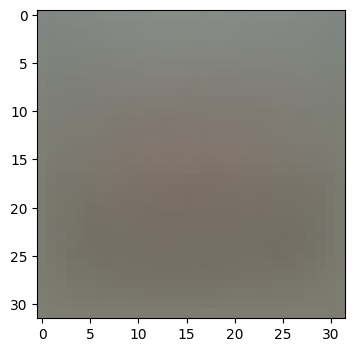

Размеры обучающей выборки с учетом смещения: (5000, 3073)
Размеры тестовой выборки с учетом смещения: (500, 3073)
Размеры валидационной выборки с учетом смещения: (500, 3073)


In [34]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print("Размеры обучающей выборки с учетом смещения:", X_train.shape)
print("Размеры тестовой выборки с учетом смещения:", X_test.shape)
print("Размеры валидационной выборки с учетом смещения:", X_val.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [35]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.333346
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [36]:
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_train, y_train, 5e1)
f = lambda w: softmax_loss_naive(w, X_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 1.897176 analytic: 1.897176, relative error: 2.612579e-08
numerical: -0.327066 analytic: -0.327066, relative error: 2.298154e-08
numerical: 0.649494 analytic: 0.649494, relative error: 7.488328e-08
numerical: 2.542951 analytic: 2.542951, relative error: 1.249848e-08
numerical: 3.065446 analytic: 3.065446, relative error: 8.620607e-09
numerical: 1.848314 analytic: 1.848313, relative error: 3.223513e-08
numerical: 0.917548 analytic: 0.917547, relative error: 9.203290e-08
numerical: 1.742230 analytic: 1.742230, relative error: 3.060156e-09
numerical: -2.655820 analytic: -2.655820, relative error: 1.195056e-08
numerical: 4.395586 analytic: 4.395586, relative error: 2.286944e-08
numerical: -0.825541 analytic: -0.825541, relative error: 2.180650e-08
numerical: -0.446677 analytic: -0.446677, relative error: 7.223205e-08
numerical: -1.733282 analytic: -1.733282, relative error: 8.945552e-09
numerical: 4.209574 analytic: 4.209574, relative error: 2.659713e-08
numerical: -0.038177 ana

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [37]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train, y_train, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train, y_train, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.333346e+00 computed in 0.448083s
vectorized loss: 2.333346e+00 computed in 0.054155s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [44]:
def calc_accuracy(y_pred, y_test):
  return float(np.mean(y_pred == y_test));

In [62]:
from scripts.classifiers.linear_classifier import Softmax
softmax = Softmax()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
y_test_pred = softmax.predict(X_test)
print(f'Точность на тестовой выборке: {calc_accuracy(y_test_pred, y_test)}')
y_val_pred = softmax.predict(X_val)
print(f'Точность на валидационной выборке: {calc_accuracy(y_val_pred, y_val)}')

iteration 0 / 1500: loss 783.246054
iteration 100 / 1500: loss 284.807505
iteration 200 / 1500: loss 105.480199
iteration 300 / 1500: loss 39.942835
iteration 400 / 1500: loss 16.012375
iteration 500 / 1500: loss 7.168805
iteration 600 / 1500: loss 3.986939
iteration 700 / 1500: loss 2.803009
iteration 800 / 1500: loss 2.408269
iteration 900 / 1500: loss 2.227268
iteration 1000 / 1500: loss 2.101218
iteration 1100 / 1500: loss 2.126728
iteration 1200 / 1500: loss 2.094383
iteration 1300 / 1500: loss 2.092210
iteration 1400 / 1500: loss 2.083686
Точность на тестовой выборке: 0.2952
Точность на валидационной выборке: 0.2802


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [51]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [56]:
results = {}

for lr in learning_rates:
    for reg in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=1500, verbose=True)
        y_val_pred = softmax.predict(X_val)
        val_accuracy = calc_accuracy(y_val_pred, y_val)
        results[(lr, reg)] = (val_accuracy)

iteration 0 / 1500: loss 775.939346
iteration 100 / 1500: loss 282.929465
iteration 200 / 1500: loss 104.877709
iteration 300 / 1500: loss 39.743362
iteration 400 / 1500: loss 15.888906
iteration 500 / 1500: loss 7.107047
iteration 600 / 1500: loss 3.925251
iteration 700 / 1500: loss 2.776269
iteration 800 / 1500: loss 2.402989
iteration 900 / 1500: loss 2.251726
iteration 1000 / 1500: loss 2.112919
iteration 1100 / 1500: loss 2.070622
iteration 1200 / 1500: loss 2.050871
iteration 1300 / 1500: loss 2.111743
iteration 1400 / 1500: loss 2.173327
iteration 0 / 1500: loss 1535.351214
iteration 100 / 1500: loss 206.012541
iteration 200 / 1500: loss 29.388520
iteration 300 / 1500: loss 5.822000
iteration 400 / 1500: loss 2.698157
iteration 500 / 1500: loss 2.266751
iteration 600 / 1500: loss 2.184030
iteration 700 / 1500: loss 2.216060
iteration 800 / 1500: loss 2.167058
iteration 900 / 1500: loss 2.173779
iteration 1000 / 1500: loss 2.152550
iteration 1100 / 1500: loss 2.205750
iteration 1

In [57]:
for (lr, reg) in results:
    print(f"lr={lr}, reg={reg} , mean={results[(lr, reg)]:.4f}")

best_params = max(results, key=results.get)
print("Лучшие параметры =", best_params)

lr=1e-07, reg=25000.0 , mean=0.3118
lr=1e-07, reg=50000.0 , mean=0.2662
lr=5e-05, reg=25000.0 , mean=0.1054
lr=5e-05, reg=50000.0 , mean=0.0952
Лучшие параметры = (1e-07, 25000.0)


In [61]:
softmax_best = Softmax()
softmax_best.train(X_train, y_train, learning_rate=best_params[0], reg=best_params[1], num_iters=1500)
y_pred_test = softmax_best.predict(X_test)
test_accuracy = np.mean(y_pred_test == y_test)
print("Точность на тестовой выборке:", test_accuracy)

Точность на тестовой выборке: 0.3096


3.10 Сделайте выводы по третьей части задания

Точность классификации на тестовой выборке после обучения softmax-классификатора составила 0.2952.
После кросс-валидации были выбраны оптимальные значения гиперпараметров: learning_rate=1e-07 и regularization_strength=25000.
После повторного обучения softmax-классификатора с использованием оптимальных параметров, точность классификации на тестовой выборке улучшилась до около 0.3096. Модель достигла приемлемой точности, что подтверждает корректность выбранных гиперпараметров.